In [7]:
# Performed as a part of curriculum at Great learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196944B6780>,
      dtype=object)

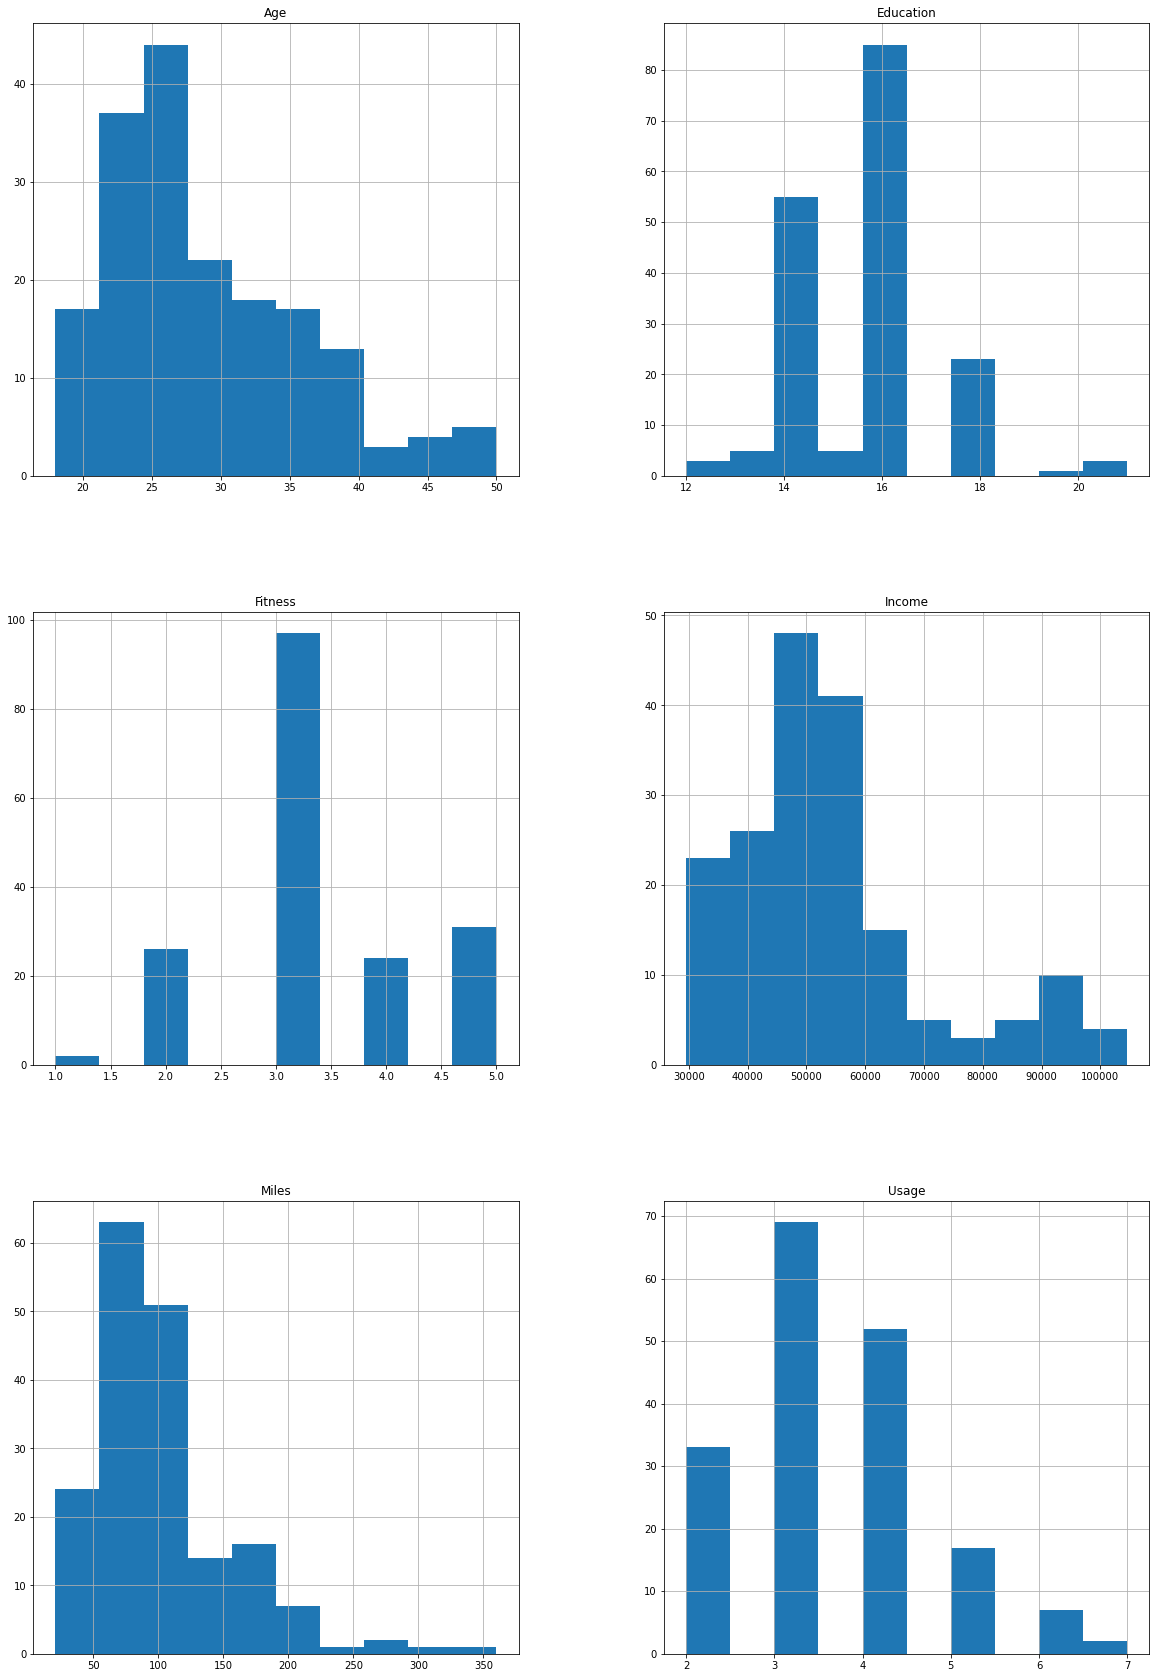

In [6]:
df.hist(figsize=(20,30))

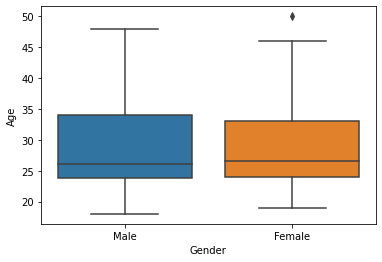

In [8]:
sns.boxplot(x="Gender", y="Age", data=df)

In [10]:
pd.crosstab(df['Product'],df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [11]:
pd.crosstab(df['Product'],df['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


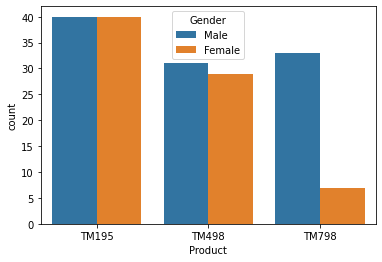

In [12]:
sns.countplot(x="Product", hue="Gender", data=df)

In [14]:
pd.pivot_table(df, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [15]:
pd.pivot_table(df,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [16]:
pd.pivot_table(df,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

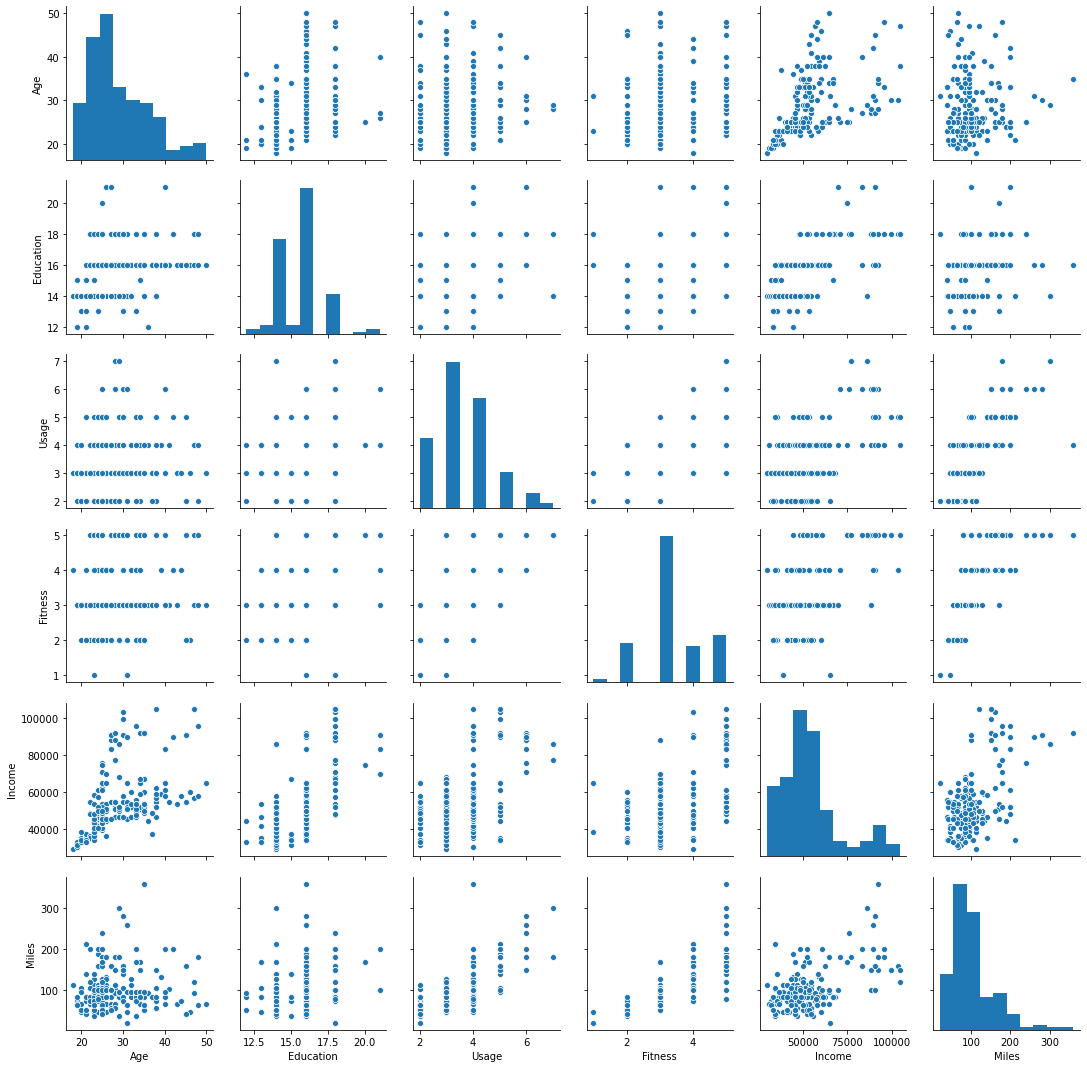

In [17]:
sns.pairplot(df)

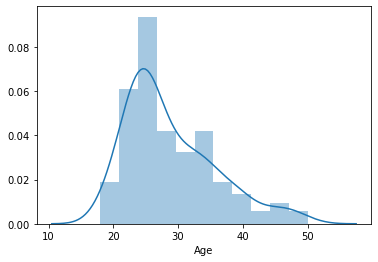

In [19]:
sns.distplot(df['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000196A881AEF0>,
      dtype=object)

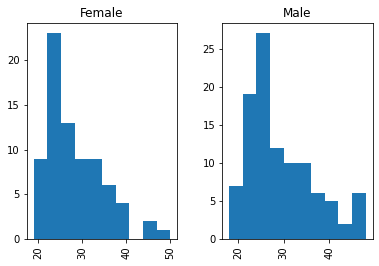

In [20]:
df.hist(by='Gender',column = 'Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000196A88E8668>,
      dtype=object)

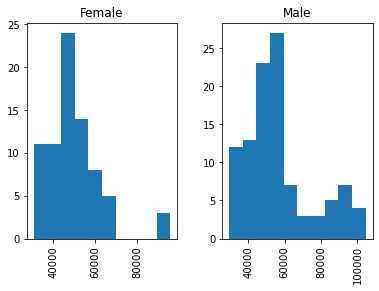

In [21]:
df.hist(by='Gender',column = 'Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000196A998EB70>,
      dtype=object)

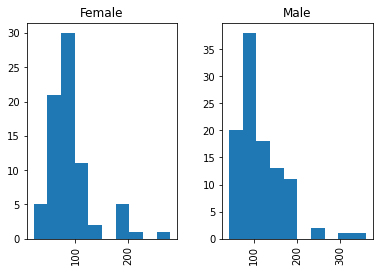

In [22]:
df.hist(by='Gender',column = 'Miles')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196A9A68C50>,
      dtype=object)

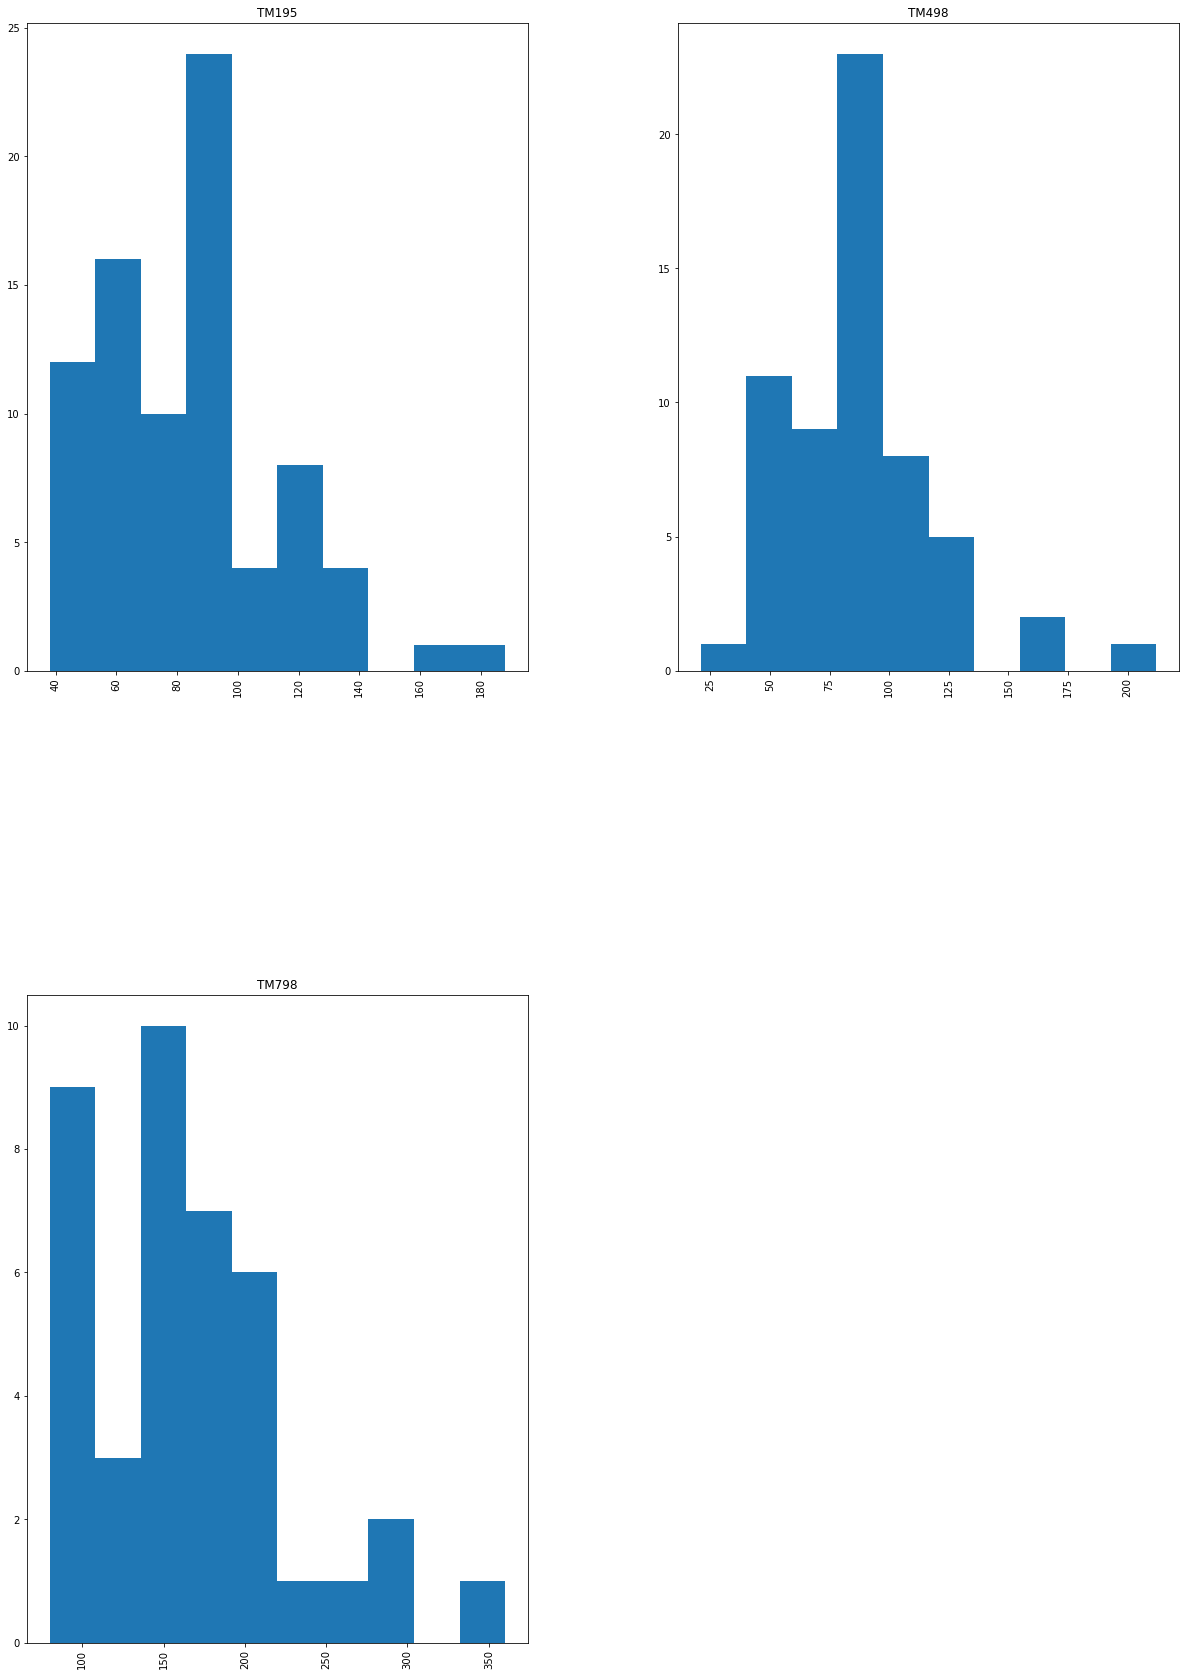

In [23]:
df.hist(by='Product',column = 'Miles', figsize=(20,30))

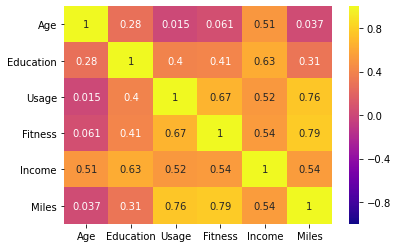

In [24]:
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)

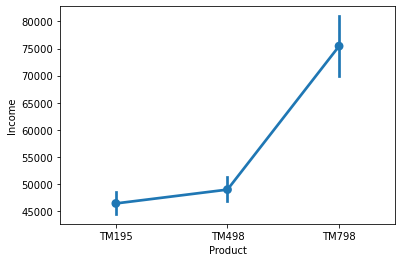

In [25]:
sns.pointplot(df['Product'],df['Income'])

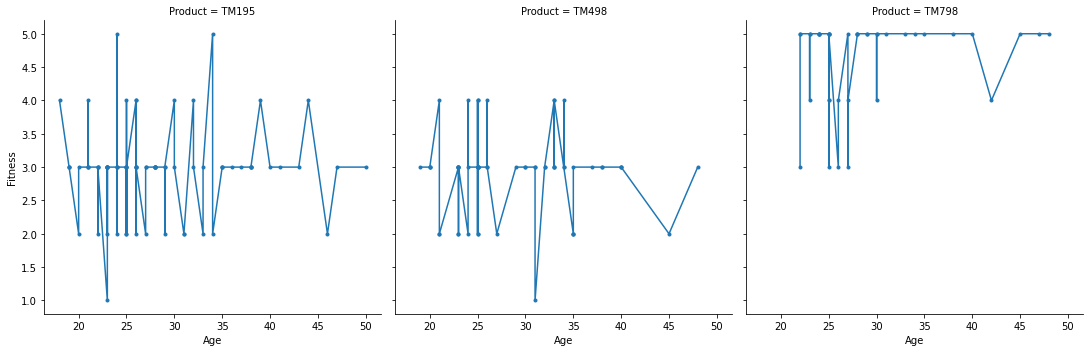

In [26]:
g=sns.FacetGrid(df,col="Product",col_wrap=5,height=5)
g=g.map(plt.plot,"Age","Fitness",marker=".")

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
y = df['Miles']
x = df[['Usage','Fitness']]
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regr.coef_

array([20.21486334, 27.20649954])

In [29]:
regr.intercept_

-56.742881784648645